# IBM Employee Attrition Analysis
### This is a Beginner Project.

The essence of this work is to investigate with the limited data given, the rate of employee retention at IBM and see if:

i.) there are any insights to be derived

ii.) it is possible to make predictions and generalisations within set limits.

In [1]:
# import necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load the dataset.

filepath = 'Datasets/IBM Attrition Data.csv'

attrition = pd.read_csv(filepath)

### Overall Approach/ Strategy
1. Data Examination
2. Data Exploration
3. Data Cleaning/wrangling
4. Data Visualization
5. Feature Engineering
6. Modelling
7. Evaluating the Model
8. Extraction for Deployment

In [2]:
# Examine the dataset.
attrition.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


As seen from above the data seems a bit clean, i.e no null values, proper data types etc.

In [4]:
# Just to be sure

attrition.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [5]:
attrition.groupby('Attrition').count()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Attrition,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,237,237


In [6]:
attrition.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [7]:
# Change Attrition label to numbers using sklearn's label encoder. 
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

attrition['Attrition_by_number'] = label.fit_transform(attrition['Attrition'])
attrition['MaritalStatus_by_number'] = label.fit_transform(attrition['MaritalStatus'])
attrition['EducationField_by_number'] = label.fit_transform(attrition['EducationField'])
attrition['Department_by_number'] = label.fit_transform(attrition['Department'])


attrition.head(5)


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_by_number,MaritalStatus_by_number,EducationField_by_number,Department_by_number
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,1,2,1,2
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,0,1,1,1
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,1,2,4,1
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,0,1,1,1
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,0,1,3,1


In [8]:
# Correlation is my friend(at least for now).

attrition.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_by_number,MaritalStatus_by_number,EducationField_by_number,Department_by_number
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309,-0.159205,-0.095029,-0.040873,-0.031882
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508,0.077924,-0.014437,0.002013,0.017225
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114,-0.031373,0.004053,-0.039592,0.007996
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458,-0.103369,-0.003593,0.043163,-0.019395
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803,-0.103481,0.024360,-0.034401,0.021001
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285,-0.159840,-0.075450,-0.041070,0.053130
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421,0.043494,-0.035505,-0.008663,-0.035882
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089,-0.063939,0.014708,0.041191,0.026383
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000,-0.134392,-0.059986,-0.018692,0.022920
Attrition_by_number,-0.159205,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,-0.063939,-0.134392,1.000000,0.162070,0.026846,0.063991


### Preliminary Conclusions aka Biased musings
It's strange to see Monthly income having no strong relationship(at least greater than an absolute value of 0.5). That being said it has the highest relationship. A point to note is also that Attrition is binary, hence not continous, thus a lot of information could have been lost in the middle, which hopefully we'll get to discover.


### Visualize the data to check for insights.

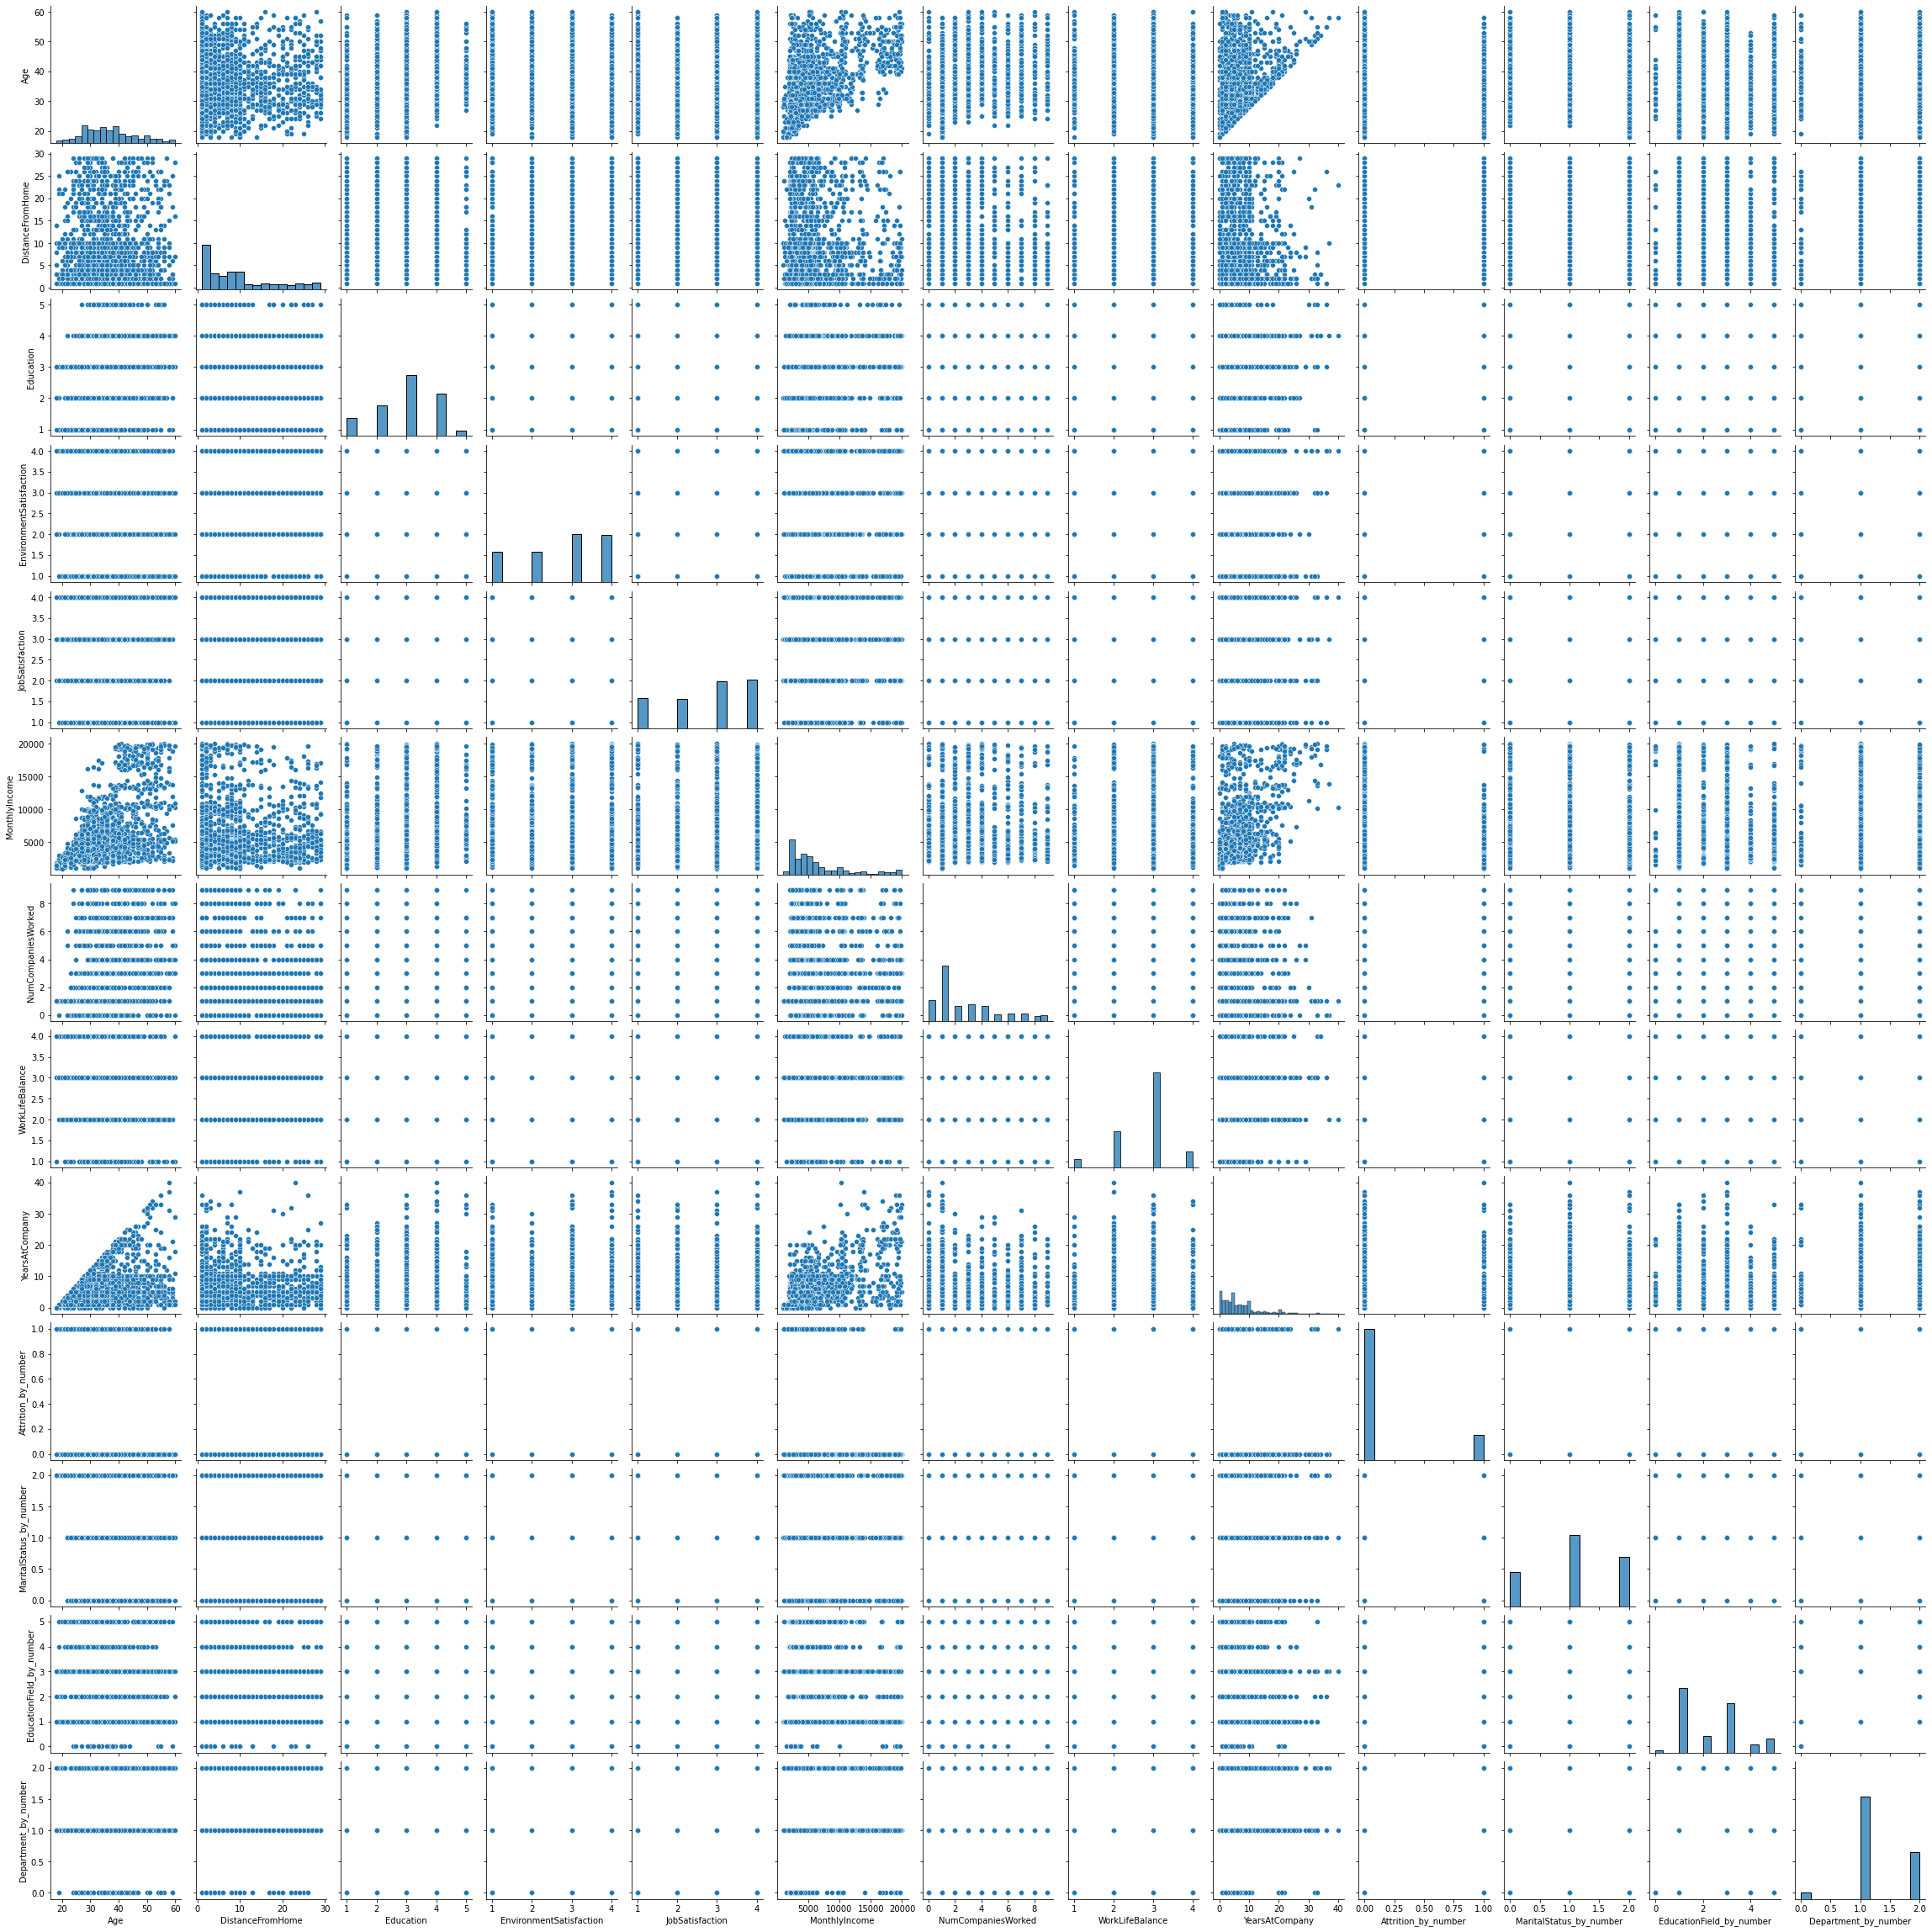

In [9]:
# A pair plot first to (confuse, ahem), check for relationships(thanks, Jose Portilla.

#plt.figure(figsize=(16,3))
#plt.title('Pair plot of the data')
sns.pairplot(data=attrition)

Wow Some extraordinary leads we have here!

<AxesSubplot:title={'center':'A plot of Age against Year at Company'}, xlabel='YearsAtCompany', ylabel='Age'>

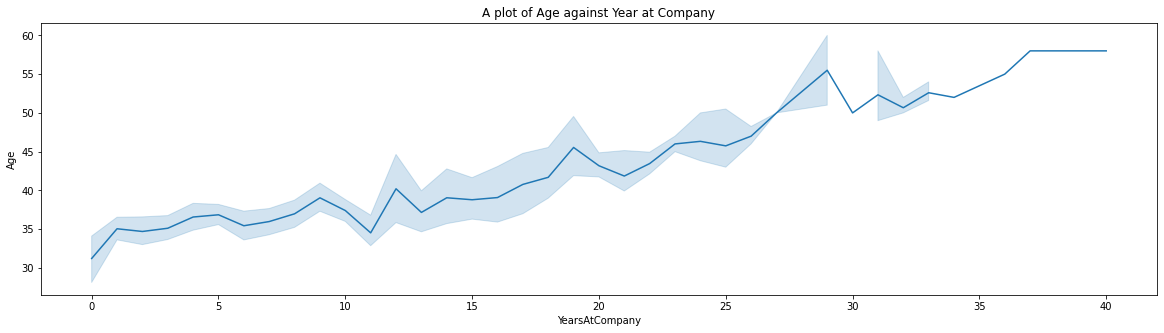

In [10]:
# Age vs Years at Company
plt.figure(figsize=(20,5))
plt.title('A plot of Age against Year at Company')
sns.lineplot(x='YearsAtCompany',y='Age', data=attrition)

Like duh, that's apparent, obviously you grow older the longer you stay at the company. Data tell me something I don't know.
Still jumbled? when in doubt, correlation is my friend(I guess).

<AxesSubplot:title={'center':'Correlation between features'}>

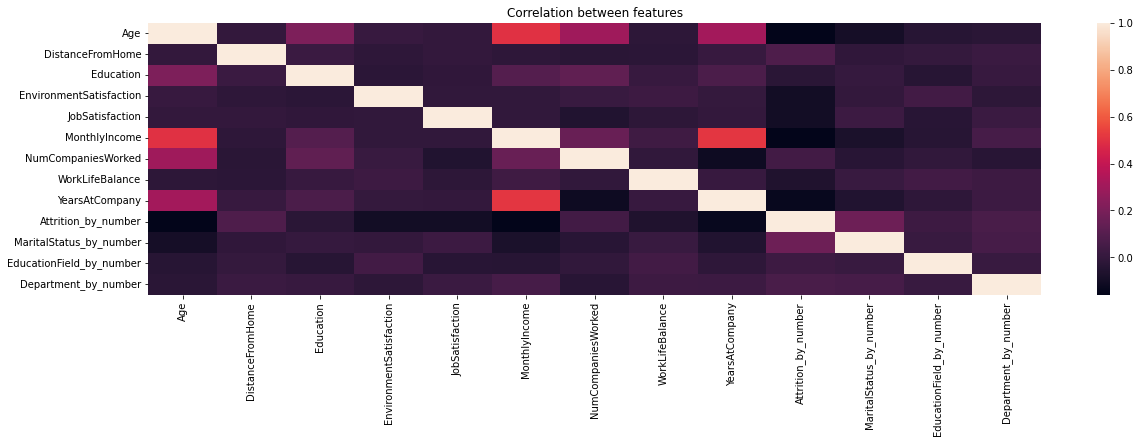

In [11]:
# Heatmap of correlation

plt.figure(figsize=(20,5))
plt.title('Correlation between features')
sns.heatmap(data=attrition.corr())

Correlation betrayed me!, But wait a minute! What business should Age and Monthly income have with each other besides it being expected that Education ought to have confounded both.(Ignore my attempt at speaking jargon) 

<AxesSubplot:title={'center':'A plot of Monthly Income against Education'}, xlabel='Education', ylabel='MonthlyIncome'>

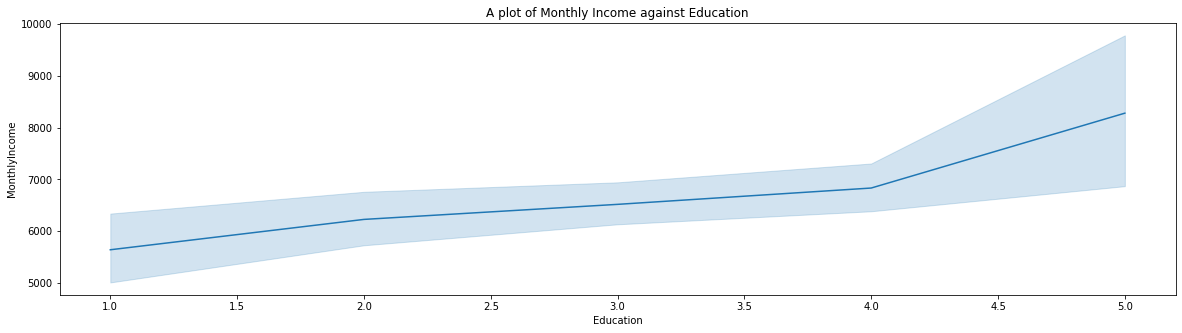

In [12]:
plt.figure(figsize=(20,5))
plt.title('A plot of Monthly Income against Education')
sns.lineplot(x ='Education',y='MonthlyIncome',data=attrition)

<AxesSubplot:title={'center':'A plot of MonthlyIncome against Age'}, xlabel='Age', ylabel='MonthlyIncome'>

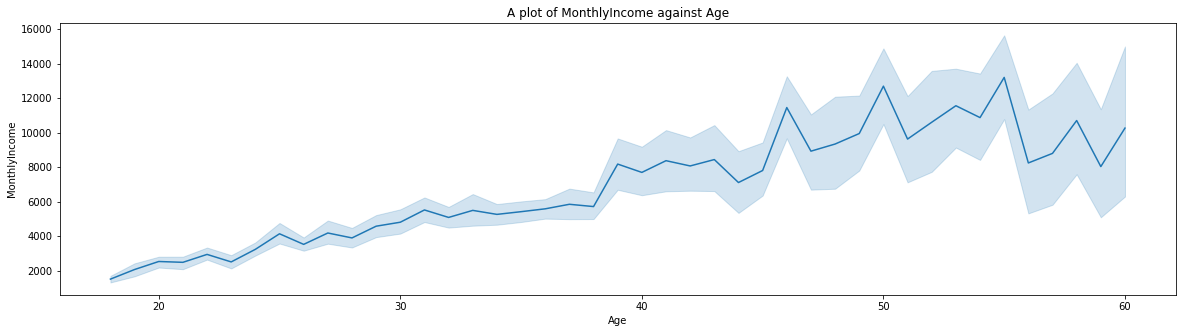

In [13]:
plt.figure(figsize=(20,5))
plt.title('A plot of MonthlyIncome against Age')
sns.lineplot(x='Age',y='MonthlyIncome',data=attrition)

<AxesSubplot:title={'center':'A plot of Education against Age'}, xlabel='Age', ylabel='Education'>

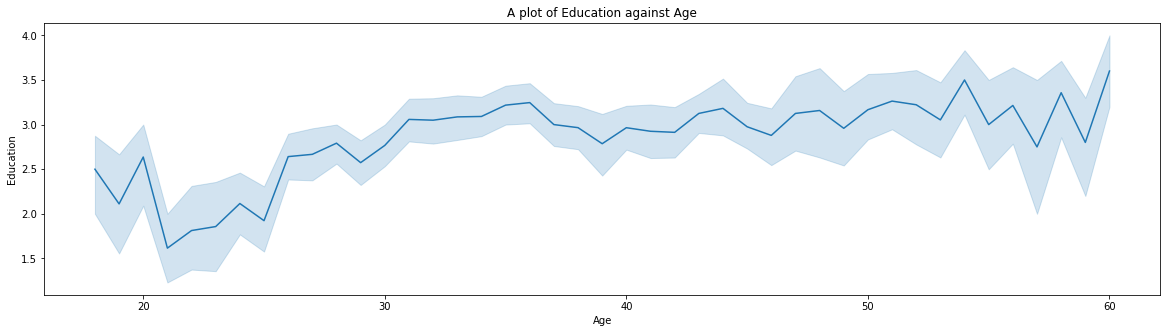

In [14]:
plt.figure(figsize=(20,5))
plt.title('A plot of Education against Age')
sns.lineplot(x='Age',y='Education',data=attrition)

Now this makes no sense(you can't be less educated as the years go by), I'm going to go out on a limb here and say unequivocally that unless the 'coding' for the Education variable is known, no reasonable conclusions can be drawn from these, so, we move.

### Feature Engineering
Nothing much besides standard scaling.
I have minimal data, so no 3 splits for me(maybe C.V, when I know enough).

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assigning features and label(target), Yep, packing it all in #trialanderrormodeactivated.
features = ['Age', 'Department_by_number', 'DistanceFromHome', 'Education','EducationField_by_number',
            'EnvironmentSatisfaction','JobSatisfaction','MaritalStatus_by_number', 'MonthlyIncome', 
            'NumCompaniesWorked','WorkLifeBalance', 'YearsAtCompany']

X = attrition[features]
y = attrition['Attrition_by_number']

# SYDD ask @quaesita
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [143]:
# Standardizing the features

scaler = StandardScaler()

X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

### Modelling
As a proud "Amateur", I intend to use both a random forest classifier and logistic regression to predict employee attrition. The more I know, the better I intend to make this attempt, by revisitation.

In [153]:
# import needed models.
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


pipeline = {'rf':make_pipeline(RandomForestClassifier(random_state=1234)),
           'lg':make_pipeline(LogisticRegression(random_state=1234)),
            'kn':make_pipeline(KNeighborsClassifier())
           }

In [155]:
# Setting up a hyper parameter grid

hypergrid = {
    'rf': {
        #'randomforestclassifier__max_leaf_nodes':[100,300,500],
        'randomforestclassifier__max_depth':[5,10,15],
        'randomforestclassifier__n_estimators':[20,50,100,200]
        },
    'lg': {
        'logisticregression__max_iter':[100,300,500,1000]
        },
    'kn':{
        'kneighborsclassifier__n_neighbors':[3,5,7,11]
    }
}
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [156]:

fit_models_standard = {}

for algo,pipeline in pipeline.items():
    model_standard = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}'.format(algo))
        model_standard.fit(X_train_standard, y_train)
        fit_models_standard[algo] = model_standard
        print('{} has been successfully trained'.format(algo))
    except NotFittedError as e:
        print(repr(e))
        

Starting training for rf
rf has been successfully trained
Starting training for lg
lg has been successfully trained
Starting training for kn
kn has been successfully trained


### Evaluating the Model

In [170]:
# Evaluation

from sklearn.metrics import classification_report, accuracy_score


In [171]:
for algo,model in fit_models_standard.items():
    yhat_std = fit_models_standard[algo].predict(X_test_standard)
    print('{}'.format(algo))
    print(classification_report(y_test, yhat_std))
    #print('Predicted labels: ', yhat_std)
    #print('Accuracy: ', accuracy_score(y_test, yhat_std))

rf
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       407
           1       0.56      0.11      0.19        79

    accuracy                           0.84       486
   macro avg       0.71      0.55      0.55       486
weighted avg       0.80      0.84      0.79       486

lg
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       407
           1       0.42      0.06      0.11        79

    accuracy                           0.83       486
   macro avg       0.63      0.52      0.51       486
weighted avg       0.77      0.83      0.78       486

kn
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       407
           1       0.25      0.05      0.08        79

    accuracy                           0.82       486
   macro avg       0.55      0.51      0.49       486
weighted avg       0.74      0.82      0.77       486



 Random Forests seems to perform best all round, so RF it is.
 
 Note to Self: the data seems to be inbalanced.

In [172]:
best_model = fit_models_standard['rf']

In [173]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=1234))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10, 15],
                         'randomforestclassifier__n_estimators': [20, 50, 100,
                                                                  200]})

### Deployment
Just kidding, Extracting the model.

In [174]:
import pickle
model_filename = 'IBM_Attrition-model.pkl'
pickle.dump(best_model, open(model_filename,'wb'))

In [183]:
# check 
model = pickle.load(open('IBM_Attrition-model.pkl','rb'))
predictions = model.predict(X_test_standard)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       407
           1       0.56      0.11      0.19        79

    accuracy                           0.84       486
   macro avg       0.71      0.55      0.55       486
weighted avg       0.80      0.84      0.79       486



# Conclusion
Our model has been trained, with the metrics as given above, pretty fair all things considered, hopefully will improve upon it with more knowledge at my disposal.

### Thanks for sticking with me on this Journey. Till we visualize again(cringes), stay safe.